<h1 style="color: #2E8B57;">Renewable Energy Trends 2000-2020</h1>

<h2 style="color: #2E8B57;">Importing Libraries</h2>

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import scipy.stats as st

In [2]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

<h2 style="color: #2E8B57;">Data extraction</h2>

In [3]:
wrl_green_energy = pd.read_csv('global-data-on-sustainable-energy (1) (2).csv')

<h2 style="color: #2E8B57;">Exploring the dataset</h2>

In [4]:
wrl_green_energy.sample(10)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
293,Bangladesh,2020,96.20000,25.0,3.12,NaN,NaN,74.41,0.00,1.31,...,2730.07800,NaN,NaN,0.658082,3.509136,1961.613749,"1,265",148460.0,23.684994,90.356331
3595,Yemen,2009,59.50124,59.5,0.04,11170000.0,0.70,6.34,0.00,0.00,...,4277.22360,3.380211,NaN,NaN,NaN,NaN,56,527968.0,15.552727,48.516388
2189,Montenegro,2011,99.00000,62.6,NaN,NaN,42.77,1.45,0.00,1.20,...,21941.47900,4.390000,2539.999962,NaN,3.228451,7328.932252,47,13812.0,42.708678,19.374390
2006,Malawi,2010,8.70000,2.5,20.63,15180000.0,81.21,0.13,0.00,1.83,...,640.52893,3.860000,889.999986,NaN,6.874066,478.668688,203,118484.0,-13.254308,34.301525
2594,Paraguay,2017,99.30000,66.8,1288.69,NaN,60.12,0.00,0.00,59.23,...,23435.64500,3.420000,8060.000420,NaN,4.810079,5678.869972,18,406752.0,-23.442503,-58.443832
3369,Turkey,2014,100.00000,94.8,361.78,515970000.0,11.51,199.00,0.00,52.62,...,18718.59400,2.590000,NaN,9.769227,4.939715,12157.990430,110,783562.0,38.963745,35.243322
2076,Mali,2017,34.78000,0.9,20.23,7520000.0,76.37,1.64,0.00,1.65,...,1234.19340,4.900000,5179.999828,NaN,5.305456,830.021515,17,1240192.0,17.570692,-3.996166
818,Costa Rica,2020,99.90000,95.7,613.34,NaN,NaN,0.19,0.00,11.55,...,11486.32400,NaN,NaN,NaN,-4.063677,12140.854150,100,51100.0,9.748917,-83.753428
3212,Switzerland,2004,100.00000,100.0,NaN,NaN,18.10,2.92,25.61,31.12,...,47846.15600,2.440000,45279.998780,28.436500,2.821528,54878.471000,219,41277.0,46.818188,8.227512
1830,Latvia,2002,100.00000,100.0,NaN,NaN,34.38,1.49,0.00,2.48,...,17635.33600,4.920000,7349.999905,17.687973,7.087086,4136.933297,30,64589.0,56.879635,24.603189


In [5]:
wrl_green_energy.shape

(3649, 21)

In [6]:
wrl_green_energy.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

##### Dataset key features (retrieved from Kaggle's webpage):

- `Entity`: The name of the country or region for which the data is reported.
- `Year`: The year for which the data is reported, ranging from 2000 to 2020.
- `Access to electricity (% of population)`: The percentage of population with access to electricity.
- `Access to clean fuels for cooking (% of population)`: The percentage of the population with primary reliance on clean fuels.
- `Renewable-electricity-generating-capacity-per-capita`: Installed Renewable energy capacity per person
- `Financial flows to developing countries (US $)`: Aid and assistance from developed countries for clean energy projects.
- `Renewable energy share in total final energy consumption (%)`: Percentage of renewable energy in final energy consumption.
- `Electricity from fossil fuels (TWh)`: Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.
- `Electricity from nuclear (TWh)`: Electricity generated from nuclear power in terawatt-hours.
- `Electricity from renewables (TWh)`: Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.
- `Low-carbon electricity (% electricity)`: Percentage of electricity from low-carbon sources (nuclear and renewables).
- `Primary energy consumption per capita (kWh/person)`: Energy consumption per person in kilowatt-hours.
- `Energy intensity level of primary energy (MJ/$2011 PPP GDP)`: Energy use per unit of GDP at purchasing power parity.
- `Value_co2_emissions (metric tons per capita)`: Carbon dioxide emissions per person in metric tons.
- `Renewables (% equivalent primary energy)`: Equivalent primary energy that is derived from renewable sources.
- `GDP growth (annual %)`: Annual GDP growth rate based on constant local currency.
- `GDP per capita`: Gross domestic product per person.
- `Density (P/Km2)`: Population density in persons per square kilometer.
- `Land Area (Km2)`: Total land area in square kilometers.
- `Latitude`: Latitude of the country's centroid in decimal degrees.
- `Longitude`: Longitude of the country's centroid in decimal degrees.

In [7]:
# snake_case
wrl_green_energy.columns = wrl_green_energy.columns.str.lower().str.replace(" ", "_")
wrl_green_energy.head(0)

,entity,year,access_to_electricity_(%_of_population),access_to_clean_fuels_for_cooking,renewable-electricity-generating-capacity-per-capita,financial_flows_to_developing_countries_(us_$),renewable_energy_share_in_the_total_final_energy_consumption_(%),electricity_from_fossil_fuels_(twh),electricity_from_nuclear_(twh),electricity_from_renewables_(twh),...,primary_energy_consumption_per_capita_(kwh/person),energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp),value_co2_emissions_kt_by_country,renewables_(%_equivalent_primary_energy),gdp_growth,gdp_per_capita,density\n(p/km2),land_area(km2),latitude,longitude


In [8]:
#renaming entity column
wrl_green_energy.rename(columns={"entity":"country"}, inplace= True)

In [9]:
wrl_green_energy["country"].value_counts()

country
Afghanistan      21
Oman             21
Netherlands      21
New Caledonia    21
New Zealand      21
                 ..
Zimbabwe         21
Serbia           14
Montenegro       14
South Sudan       8
French Guiana     1
Name: count, Length: 176, dtype: int64

In [10]:
years_list = wrl_green_energy["year"].unique()
years_list.sort()
years_list

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

**First impression:**
- At a first glance one can notice that from the 176 countries, a few of them do not present data throughout all the years considered (2000-2020). Will be dropped later on.

<h2 style="color: #2E8B57;">Data Cleaning</h2>

<h3 style="color: #2E8B57;">Filtering by countries with info for the whole period</h3>

In [11]:
exclude_countries = ["Serbia", "Montenegro", "South Sudan", "French Guiana"]
df_wrl_green_energy = wrl_green_energy[~wrl_green_energy["country"].isin(exclude_countries)]

In [12]:
df_wrl_green_energy["country"].value_counts()

country
Afghanistan      21
Oman             21
Netherlands      21
New Caledonia    21
New Zealand      21
                 ..
Gabon            21
Gambia           21
Georgia          21
Germany          21
Zimbabwe         21
Name: count, Length: 172, dtype: int64

<h3 style="color: #2E8B57;">Checking Null values</h3>

In [13]:
df_wrl_green_energy.isna().sum()

country                                                                0
year                                                                   0
access_to_electricity_(%_of_population)                                9
access_to_clean_fuels_for_cooking                                    168
renewable-electricity-generating-capacity-per-capita                 903
financial_flows_to_developing_countries_(us_$)                      2058
renewable_energy_share_in_the_total_final_energy_consumption_(%)     191
electricity_from_fossil_fuels_(twh)                                   21
electricity_from_nuclear_(twh)                                       126
electricity_from_renewables_(twh)                                     21
low-carbon_electricity_(%_electricity)                                42
primary_energy_consumption_per_capita_(kwh/person)                     0
energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp)          199
value_co2_emissions_kt_by_country                  

In [14]:
for col in df_wrl_green_energy.columns:
    percentage_of_NaN = round(df_wrl_green_energy[f"{col}"].isna().sum()/len(df_wrl_green_energy)*100, 2)
    print(f"{col} % of NaNs: {percentage_of_NaN}%")

country % of NaNs: 0.0%
year % of NaNs: 0.0%
access_to_electricity_(%_of_population) % of NaNs: 0.25%
access_to_clean_fuels_for_cooking % of NaNs: 4.65%
renewable-electricity-generating-capacity-per-capita % of NaNs: 25.0%
financial_flows_to_developing_countries_(us_$) % of NaNs: 56.98%
renewable_energy_share_in_the_total_final_energy_consumption_(%) % of NaNs: 5.29%
electricity_from_fossil_fuels_(twh) % of NaNs: 0.58%
electricity_from_nuclear_(twh) % of NaNs: 3.49%
electricity_from_renewables_(twh) % of NaNs: 0.58%
low-carbon_electricity_(%_electricity) % of NaNs: 1.16%
primary_energy_consumption_per_capita_(kwh/person) % of NaNs: 0.0%
energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp) % of NaNs: 5.51%
value_co2_emissions_kt_by_country % of NaNs: 11.74%
renewables_(%_equivalent_primary_energy) % of NaNs: 58.14%
gdp_growth % of NaNs: 8.61%
gdp_per_capita % of NaNs: 7.64%
density\n(p/km2) % of NaNs: 0.0%
land_area(km2) % of NaNs: 0.0%
latitude % of NaNs: 0.0%
longitude % of NaN

- Given NaN high percentage in `renewable-electricity-generating-capacity-per-capita`, `financial_flows_to_developing_countries_(us_$)`, `renewables_(%_equivalent_primary_energy)` I will drop them. 

<h3 style="color: #2E8B57;">Dropping columns</h3>

In [15]:
df_wrl_green_energy.drop(columns=['renewable-electricity-generating-capacity-per-capita', 'financial_flows_to_developing_countries_(us_$)', 'renewables_(%_equivalent_primary_energy)'], inplace = True)

In [16]:
#checking NaNs again
df_wrl_green_energy.isna().sum()

country                                                               0
year                                                                  0
access_to_electricity_(%_of_population)                               9
access_to_clean_fuels_for_cooking                                   168
renewable_energy_share_in_the_total_final_energy_consumption_(%)    191
electricity_from_fossil_fuels_(twh)                                  21
electricity_from_nuclear_(twh)                                      126
electricity_from_renewables_(twh)                                    21
low-carbon_electricity_(%_electricity)                               42
primary_energy_consumption_per_capita_(kwh/person)                    0
energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp)         199
value_co2_emissions_kt_by_country                                   424
gdp_growth                                                          311
gdp_per_capita                                                  

<h3 style="color: #2E8B57;">Dealing with Null values</h3>

In [17]:
##filling Null values with median value in each column

for col in df_wrl_green_energy.columns:
    if df_wrl_green_energy[col].isna().sum() > 0:
        df_wrl_green_energy[col] = df_wrl_green_energy[col].fillna(round(df_wrl_green_energy[col].median(),2))     

In [18]:
#checking NaNs again
df_wrl_green_energy.isna().sum()

country                                                             0
year                                                                0
access_to_electricity_(%_of_population)                             0
access_to_clean_fuels_for_cooking                                   0
renewable_energy_share_in_the_total_final_energy_consumption_(%)    0
electricity_from_fossil_fuels_(twh)                                 0
electricity_from_nuclear_(twh)                                      0
electricity_from_renewables_(twh)                                   0
low-carbon_electricity_(%_electricity)                              0
primary_energy_consumption_per_capita_(kwh/person)                  0
energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp)         0
value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita                                                      0
density\n(p/km2)    

<h3 style="color:#2E8B57;">Checking Duplicates</h3>

In [19]:
df_wrl_green_energy.duplicated().sum()

0

<h3 style="color: #2E8B57;">Checking Empty Spaces</h3>

In [20]:
df_wrl_green_energy.eq(" ").sum()

country                                                             0
year                                                                0
access_to_electricity_(%_of_population)                             0
access_to_clean_fuels_for_cooking                                   0
renewable_energy_share_in_the_total_final_energy_consumption_(%)    0
electricity_from_fossil_fuels_(twh)                                 0
electricity_from_nuclear_(twh)                                      0
electricity_from_renewables_(twh)                                   0
low-carbon_electricity_(%_electricity)                              0
primary_energy_consumption_per_capita_(kwh/person)                  0
energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp)         0
value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita                                                      0
density\n(p/km2)    

<h3 style="color: #2E8B57;">Checking column types</h3>

In [48]:
df_wrl_green_energy.dtypes

country                                                              object
year                                                                  int64
access_to_electricity_(%_of_population)                             float64
access_to_clean_fuels_for_cooking                                   float64
renewable_energy_share_in_the_total_final_energy_consumption_(%)    float64
electricity_from_fossil_fuels_(twh)                                 float64
electricity_from_nuclear_(twh)                                      float64
electricity_from_renewables_(twh)                                   float64
low-carbon_electricity_(%_electricity)                              float64
primary_energy_consumption_per_capita_(kwh/person)                  float64
energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp)         float64
value_co2_emissions_kt_by_country                                   float64
gdp_growth                                                          float64
gdp_per_capi

<h3 style="color: #2E8B57;">Rounding float variables (excluding latitude and longitude) </h3>

In [21]:
float_variables = ['access_to_electricity_(%_of_population)',
       'access_to_clean_fuels_for_cooking',
       'renewable_energy_share_in_the_total_final_energy_consumption_(%)',
       'electricity_from_fossil_fuels_(twh)', 'electricity_from_nuclear_(twh)',
       'electricity_from_renewables_(twh)',
       'low-carbon_electricity_(%_electricity)',
       'primary_energy_consumption_per_capita_(kwh/person)',
       'energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp)',
       'value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',]

In [22]:
df_wrl_green_energy[float_variables] = df_wrl_green_energy[float_variables].apply(lambda x: round(x, 2))

<h2 style="color: #2E8B57;">EDA (Exploratory Data Analysis)</h2>

<h3 style="color: #2E8B57;">Categorical vs Numerical data</h3>

In [24]:
for col in df_wrl_green_energy.columns:
    number_unique_values = df_wrl_green_energy[f"{col}"].nunique()
    print(f"{col} number of unique values: {number_unique_values}")

country number of unique values: 172
year number of unique values: 21
access_to_electricity_(%_of_population) number of unique values: 1657
access_to_clean_fuels_for_cooking number of unique values: 882
renewable_energy_share_in_the_total_final_energy_consumption_(%) number of unique values: 2557
electricity_from_fossil_fuels_(twh) number of unique values: 1848
electricity_from_nuclear_(twh) number of unique values: 547
electricity_from_renewables_(twh) number of unique values: 1523
low-carbon_electricity_(%_electricity) number of unique values: 2180
primary_energy_consumption_per_capita_(kwh/person) number of unique values: 3589
energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp) number of unique values: 1008
value_co2_emissions_kt_by_country number of unique values: 2275
gdp_growth number of unique values: 1394
gdp_per_capita number of unique values: 3330
density\n(p/km2) number of unique values: 124
land_area(km2) number of unique values: 172
latitude number of unique values

From unique values we may start splitting categorical from numerical variables 

Categorical:
- `country`
- `year`

Numerical:
All the remainder

Geographical data:
- `latitude` 
- `longitude`

In [28]:
#Splitting numerical and categorical variables in two dataframes

df_num = df_wrl_green_energy[['access_to_electricity_(%_of_population)',
       'access_to_clean_fuels_for_cooking',
       'renewable_energy_share_in_the_total_final_energy_consumption_(%)',
       'electricity_from_fossil_fuels_(twh)', 'electricity_from_nuclear_(twh)',
       'electricity_from_renewables_(twh)',
       'low-carbon_electricity_(%_electricity)',
       'primary_energy_consumption_per_capita_(kwh/person)',
       'energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp)',
       'value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita', 'land_area(km2)']]

<h3 style="color: #2E8B57;">New categorical variable: continent </h3>

In [32]:
#First defining continent lists for our dataset country list

africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
    'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
    'Comoros', 'Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea',
    'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
    'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho',
    'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
    'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
    'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles',
    'Sierra Leone', 'Somalia', 'South Africa', 'Sudan', 'Togo', 'Tunisia',
    'Uganda', 'Zambia', 'Zimbabwe']

asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
    'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India',
    'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
    'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia',
    'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman',
    'Pakistan', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore',
    'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand',
    'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates',
    'Uzbekistan', 'Vietnam', 'Yemen']


europe = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
    'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland',
    'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
    'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
    'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino',
    'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
    'Ukraine', 'United Kingdom', 'Vatican City']

north_america = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada',
    'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador',
    'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico',
    'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia',
    'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States']

south_america = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']

oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia',
    'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa',
    'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

#Secondly let's define the function to alocate properly each country
def continent_column(country):
    if country in africa:
        return "Africa"
    elif country in asia:
        return "Asia"
    elif country in europe:
        return "Europe"
    elif country in north_america:
        return "North America"
    elif country in south_america:
        return "South America"
    elif country in oceania:
        return "Oceania"
    else:
        return "Unknown"

In [ ]:
# Finnaly use apply to add the new column to  the dataframe
df_wrl_green_energy['continent'] = df_wrl_green_energy['country'].apply(continent_column)

In [115]:
continent_frequency_table = df_wrl_green_energy['continent'].value_counts()
continent_frequency_table.reset_index()

,continent,count
0,Africa,1029
1,Asia,819
2,Europe,735
3,North America,483
4,Oceania,231
5,South America,210
6,Unknown,105


In [116]:
continent_proportion_table = df_wrl_green_energy['continent'].value_counts(normalize=True)
continent_proportion_table.reset_index()

,continent,proportion
0,Africa,0.284884
1,Asia,0.226744
2,Europe,0.203488
3,North America,0.133721
4,Oceania,0.063953
5,South America,0.058140
6,Unknown,0.029070


In [40]:
## The Unknown territories are only 5, I will ignore them later on
df_Unknown_countries = df_wrl_green_energy[df_wrl_green_energy['continent'] == "Unknown"]
Unknown_list= df_Unknown_countries.country.unique()
Unknown_list

array(['Aruba', 'Bermuda', 'Cayman Islands', 'New Caledonia',
       'Puerto Rico'], dtype=object)

<h3 style="color: #2E8B57;">Saving my df_renewable_energy dataframe</h3>

In [55]:
df_wrl_green_energy.to_csv('world_renewable_energy.csv', index=False)

<h3 style="color: #2E8B57;">Statistical description (numerical variables)</h3>

In [29]:
df_num.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
access_to_electricity_(%_of_population),3612.0,78.98,30.15,1.25,59.81,98.22,100.00,100.00
access_to_clean_fuels_for_cooking,3612.0,64.31,38.44,0.10,25.71,83.60,100.00,100.00
renewable_energy_share_in_the_total_final_energy_consumption_(%),3612.0,32.16,29.29,0.00,6.97,23.19,52.96,96.04
electricity_from_fossil_fuels_(twh),3612.0,70.58,348.81,0.00,0.29,2.98,26.53,5184.13
electricity_from_nuclear_(twh),3612.0,13.12,72.13,0.00,0.00,0.00,0.00,809.41
electricity_from_renewables_(twh),3612.0,24.04,104.66,0.00,0.05,1.43,9.54,2184.94
low-carbon_electricity_(%_electricity),3612.0,36.75,34.23,0.00,3.02,27.82,64.29,100.00
primary_energy_consumption_per_capita_(kwh/person),3612.0,25818.89,34929.10,0.00,3116.02,13004.36,34091.76,262585.70
energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp),3612.0,5.26,3.45,0.11,3.22,4.30,5.88,32.57
value_co2_emissions_kt_by_country,3612.0,143619.08,732058.81,10.00,2555.00,10550.00,52625.00,10707219.73


<h3 style="color: #2E8B57;">Renewables - European Countries statistics (2000 vs 2019 results)</h3>

In [130]:
df_2000_2019_Europe = df_wrl_green_energy[(df_wrl_green_energy['year'] == 2000) & (df_wrl_green_energy['continent'] == "Europe") | (df_wrl_green_energy['year'] == 2019) & (df_wrl_green_energy['continent'] == "Europe")]

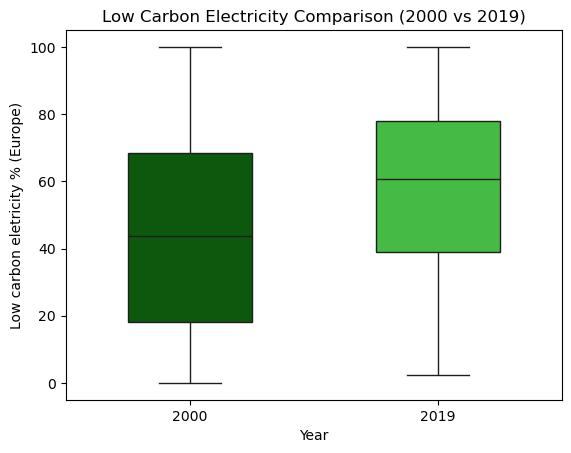

In [140]:
# Plotting a box plot to visualize the spread and outliers of 'Low carbon eletricity' for 2000 and 2019

custom_green_palette = sns.color_palette(["#006400", "#32CD32"])

sns.boxplot(data=df_2000_2019_Europe, x="year", y="low-carbon_electricity_(%_electricity)", palette=custom_green_palette, width=0.5)
plt.ylabel("Low carbon eletricity % (Europe)")
plt.xlabel("Year")
plt.title("Low Carbon Electricity Comparison (2000 vs 2019)")
plt.show()

In [124]:
df_2000_Europe = df_wrl_green_energy[(df_wrl_green_energy['year'] == 2000) & (df_wrl_green_energy['continent'] == "Europe")]

In [125]:
df_2019_Europe = df_wrl_green_energy[(df_wrl_green_energy['year'] == 2019) & (df_wrl_green_energy['continent'] == "Europe")]

- First let's see top 3 and bottom 3 for `low carbon eletricity %`

In [101]:
df_2000_Europe.sort_values(by="low-carbon_electricity_(%_electricity)", ascending=False).head(3)

,country,year,access_to_electricity_(%_of_population),access_to_clean_fuels_for_cooking,renewable_energy_share_in_the_total_final_energy_consumption_(%),electricity_from_fossil_fuels_(twh),electricity_from_nuclear_(twh),electricity_from_renewables_(twh),low-carbon_electricity_(%_electricity),primary_energy_consumption_per_capita_(kwh/person),energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp),value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,density\n(p/km2),land_area(km2),latitude,longitude,continent
1513,Iceland,2000,100.0,100.0,60.66,0.00,0.0,7.61,100.00,118057.81,11.18,2230.0,4.99,32096.37,3,103000.0,64.963051,-19.020835,Europe
2472,Norway,2000,100.0,100.0,60.18,0.32,0.0,142.11,99.78,129255.24,4.27,34290.0,3.20,38131.46,15,323802.0,60.472024,8.468946,Europe
21,Albania,2000,100.0,38.2,23.19,0.14,0.0,4.55,97.01,9029.44,4.13,3170.0,6.95,1126.68,105,28748.0,41.153332,20.168331,Europe


**Low carbon eletricity % top 3 (2000)**: 
- Iceland (100.00%);
- Norway (99.78%);
- Albania (97.01%).

In [106]:
df_2019_Europe.sort_values(by="low-carbon_electricity_(%_electricity)", ascending=False).head(3)

,country,year,access_to_electricity_(%_of_population),access_to_clean_fuels_for_cooking,renewable_energy_share_in_the_total_final_energy_consumption_(%),electricity_from_fossil_fuels_(twh),electricity_from_nuclear_(twh),electricity_from_renewables_(twh),low-carbon_electricity_(%_electricity),primary_energy_consumption_per_capita_(kwh/person),energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp),value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,density\n(p/km2),land_area(km2),latitude,longitude,continent
40,Albania,2019,100.0,80.7,23.19,0.00,0.00,5.17,100.00,11585.56,2.50,4830.0,2.11,5395.66,105,28748.0,41.153332,20.168331,Europe
1532,Iceland,2019,100.0,100.0,81.07,0.00,0.00,19.12,100.00,175527.73,12.27,1640.0,2.43,68941.46,3,103000.0,64.963051,-19.020835,Europe
3206,Sweden,2019,100.0,100.0,52.88,3.35,66.13,98.94,98.01,63283.47,3.80,35000.0,1.99,51939.43,25,450295.0,60.128161,18.643501,Europe


**Low carbon eletricity % top 3 (2019)**: 
- Albania (100.00%);
- Iceland (100.00%);
- Sweden (98.01%).

In [104]:
df_2000_Europe.sort_values(by="low-carbon_electricity_(%_electricity)", ascending=True).head(3)

,country,year,access_to_electricity_(%_of_population),access_to_clean_fuels_for_cooking,renewable_energy_share_in_the_total_final_energy_consumption_(%),electricity_from_fossil_fuels_(twh),electricity_from_nuclear_(twh),electricity_from_renewables_(twh),low-carbon_electricity_(%_electricity),primary_energy_consumption_per_capita_(kwh/person),energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp),value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,density\n(p/km2),land_area(km2),latitude,longitude,continent
2080,Malta,2000,100.0,100.0,0.00,1.92,0.0,0.00,0.00,46378.05,2.64,2130.0,19.68,10432.33,"1,380",316.0,35.937496,14.375416,Europe
315,Belarus,2000,100.0,94.7,5.65,24.51,0.0,0.03,0.12,24868.18,12.85,52940.0,5.80,1276.49,47,207600.0,53.709807,27.953389,Europe
1092,Estonia,2000,100.0,100.0,19.83,8.50,0.0,0.01,0.12,39722.04,7.95,14920.0,10.09,4070.61,31,45228.0,58.595272,25.013607,Europe


**Low carbon eletricity % bottom 3 (2000)**: 
- Malta (00.00%);
- Belarus (0.12%);
- Estonia (0.12%).

In [105]:
df_2019_Europe.sort_values(by="low-carbon_electricity_(%_electricity)", ascending=True).head(3)

,country,year,access_to_electricity_(%_of_population),access_to_clean_fuels_for_cooking,renewable_energy_share_in_the_total_final_energy_consumption_(%),electricity_from_fossil_fuels_(twh),electricity_from_nuclear_(twh),electricity_from_renewables_(twh),low-carbon_electricity_(%_electricity),primary_energy_consumption_per_capita_(kwh/person),energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp),value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,density\n(p/km2),land_area(km2),latitude,longitude,continent
334,Belarus,2019,100.0,99.5,7.83,36.74,0.0,0.94,2.49,31923.44,5.97,57670.0,1.40,6837.72,47,207600.0,53.709807,27.953389,Europe
2099,Malta,2019,100.0,100.0,7.70,1.86,0.0,0.21,10.14,80081.51,1.37,1660.0,5.54,30186.20,"1,380",316.0,35.937496,14.375416,Europe
2659,Poland,2019,100.0,100.0,12.18,137.58,0.0,25.46,15.62,30777.80,3.42,295130.0,4.74,15732.20,124,312685.0,51.919438,19.145136,Europe


**Low carbon eletricity % bottom 3 (2019)**: 
- Belarus (2.49%);
- Malta (10.14%);
- Poland (15.62%).

- Now the same for `renewable energy share`

In [107]:
df_2000_Europe.sort_values(by="renewable_energy_share_in_the_total_final_energy_consumption_(%)", ascending=False).head(3)

,country,year,access_to_electricity_(%_of_population),access_to_clean_fuels_for_cooking,renewable_energy_share_in_the_total_final_energy_consumption_(%),electricity_from_fossil_fuels_(twh),electricity_from_nuclear_(twh),electricity_from_renewables_(twh),low-carbon_electricity_(%_electricity),primary_energy_consumption_per_capita_(kwh/person),energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp),value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,density\n(p/km2),land_area(km2),latitude,longitude,continent
1513,Iceland,2000,100.0,100.0,60.66,0.00,0.00,7.61,100.00,118057.81,11.18,2230.0,4.99,32096.37,3,103000.0,64.963051,-19.020835,Europe
2472,Norway,2000,100.0,100.0,60.18,0.32,0.00,142.11,99.78,129255.24,4.27,34290.0,3.20,38131.46,15,323802.0,60.472024,8.468946,Europe
3187,Sweden,2000,100.0,100.0,39.82,4.77,57.32,83.14,96.72,72085.09,5.54,53280.0,4.77,29624.91,25,450295.0,60.128161,18.643501,Europe


**Renewable energy share top 3 (2000)**: 
- Iceland (60.66%);
- Norway (60.18%);
- Sweden (39.82%).

In [110]:
df_2019_Europe.sort_values(by="renewable_energy_share_in_the_total_final_energy_consumption_(%)", ascending=False).head(3)

,country,year,access_to_electricity_(%_of_population),access_to_clean_fuels_for_cooking,renewable_energy_share_in_the_total_final_energy_consumption_(%),electricity_from_fossil_fuels_(twh),electricity_from_nuclear_(twh),electricity_from_renewables_(twh),low-carbon_electricity_(%_electricity),primary_energy_consumption_per_capita_(kwh/person),energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp),value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,density\n(p/km2),land_area(km2),latitude,longitude,continent
1532,Iceland,2019,100.0,100.0,81.07,0.00,0.00,19.12,100.00,175527.73,12.27,1640.0,2.43,68941.46,3,103000.0,64.963051,-19.020835,Europe
2491,Norway,2019,100.0,100.0,62.37,2.76,0.00,131.07,97.94,96392.50,3.33,35950.0,0.75,75719.75,15,323802.0,60.472024,8.468946,Europe
3206,Sweden,2019,100.0,100.0,52.88,3.35,66.13,98.94,98.01,63283.47,3.80,35000.0,1.99,51939.43,25,450295.0,60.128161,18.643501,Europe


**Renewable energy share top 3 (2019)**: 
- Iceland (81.07%);
- Norway (62.37%);
- Sweden (52.88%).

In [113]:
df_2000_Europe.sort_values(by="renewable_energy_share_in_the_total_final_energy_consumption_(%)", ascending=True).head(3)

,country,year,access_to_electricity_(%_of_population),access_to_clean_fuels_for_cooking,renewable_energy_share_in_the_total_final_energy_consumption_(%),electricity_from_fossil_fuels_(twh),electricity_from_nuclear_(twh),electricity_from_renewables_(twh),low-carbon_electricity_(%_electricity),primary_energy_consumption_per_capita_(kwh/person),energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp),value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,density\n(p/km2),land_area(km2),latitude,longitude,continent
2080,Malta,2000,100.0,100.00,0.00,1.92,0.00,0.00,0.00,46378.05,2.64,2130.0,19.68,10432.33,"1,380",316.0,35.937496,14.375416,Europe
3481,United Kingdom,2000,100.0,100.00,0.96,279.34,85.06,9.98,25.39,45275.64,4.14,530890.0,3.67,28223.07,281,243610.0,55.378051,-3.435973,Europe
3439,Ukraine,2000,100.0,91.65,1.25,82.65,77.34,11.28,51.74,32435.86,15.78,297380.0,5.90,658.35,75,603550.0,48.379433,31.165580,Europe


**Renewable energy share bottom 3 (2000)**: 
- Malta (0.00%);
- UK (0.96%);
- Ukraine (1.25%).

In [114]:
df_2019_Europe.sort_values(by="renewable_energy_share_in_the_total_final_energy_consumption_(%)", ascending=True).head(3)

,country,year,access_to_electricity_(%_of_population),access_to_clean_fuels_for_cooking,renewable_energy_share_in_the_total_final_energy_consumption_(%),electricity_from_fossil_fuels_(twh),electricity_from_nuclear_(twh),electricity_from_renewables_(twh),low-carbon_electricity_(%_electricity),primary_energy_consumption_per_capita_(kwh/person),energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp),value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,density\n(p/km2),land_area(km2),latitude,longitude,continent
3458,Ukraine,2019,100.0,94.9,7.44,57.79,83.0,11.87,62.14,21661.15,6.95,174730.0,3.20,3661.46,75,603550.0,48.379433,31.165580,Europe
2099,Malta,2019,100.0,100.0,7.70,1.86,0.0,0.21,10.14,80081.51,1.37,1660.0,5.54,30186.20,"1,380",316.0,35.937496,14.375416,Europe
334,Belarus,2019,100.0,99.5,7.83,36.74,0.0,0.94,2.49,31923.44,5.97,57670.0,1.40,6837.72,47,207600.0,53.709807,27.953389,Europe


**Renewable energy share bottom 3 (2019)**: 
- Ukraine (7.44%);
- Malta (7.70%);
- Belarus (7.83%).

<h3 style="color: #2E8B57;">Continent Groupbys and Vizualisations</h3>

- I will start by defining a filtered df only with 2000 and 2019 data so that we can spot easily the differences between this period (I desregarded 2020 given that the pandemic could deviate the results) and also without Unknown continent territories.

In [79]:
#Defining first a filtered df
df_2000_2019 = df_wrl_green_energy[(df_wrl_green_energy['year'] == 2000) & (df_wrl_green_energy['continent'] != "Unknown") | (df_wrl_green_energy['year'] == 2019) & (df_wrl_green_energy['continent'] != "Unknown")]

In [80]:
round(df_2000_2019.groupby(['continent','year'])['low-carbon_electricity_(%_electricity)'].agg(['mean', 'median']).reset_index(), 2)

,continent,year,mean,median
0,Africa,2000,42.28,33.33
1,Africa,2019,38.86,26.82
2,Asia,2000,24.28,10.64
3,Asia,2019,27.53,14.70
4,Europe,2000,46.23,43.77
5,Europe,2019,58.78,60.68
6,North America,2000,29.92,26.95
7,North America,2019,30.15,16.67
8,Oceania,2000,25.04,8.63
9,Oceania,2019,27.80,27.82


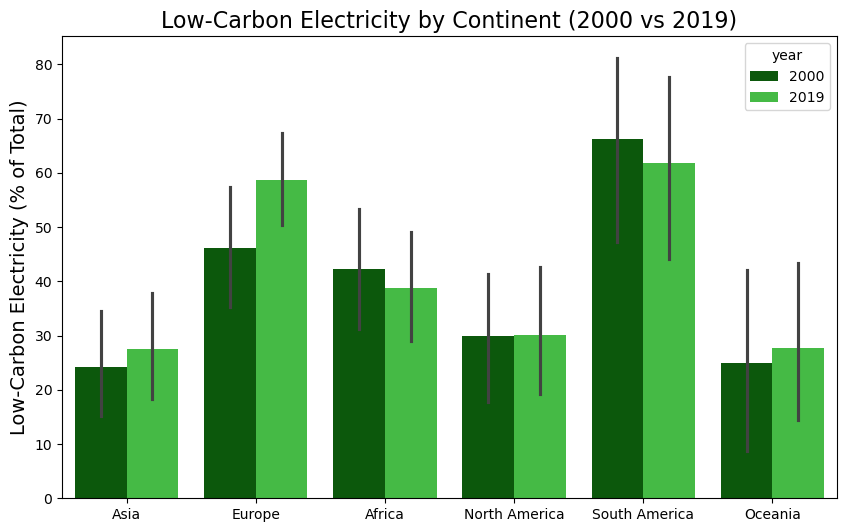

In [135]:
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='low-carbon_electricity_(%_electricity)', hue='year', data=df_2000_2019, palette=custom_green_palette)
plt.xlabel("")
plt.ylabel("Low-Carbon Electricity (% of Total)", fontsize=14)
plt.title("Low-Carbon Electricity by Continent (2000 vs 2019)", fontsize=16)
plt.show()

In [84]:
round(df_2000_2019.groupby(['continent','year'])['renewable_energy_share_in_the_total_final_energy_consumption_(%)'].agg(['mean', 'median']).reset_index(), 2)

,continent,year,mean,median
0,Africa,2000,64.00,73.44
1,Africa,2019,55.81,65.95
2,Asia,2000,24.28,5.73
3,Asia,2019,17.90,8.17
4,Europe,2000,15.63,9.32
5,Europe,2019,24.92,18.51
6,North America,2000,25.40,22.04
7,North America,2019,20.38,10.42
8,Oceania,2000,34.17,48.65
9,Oceania,2019,25.95,29.65


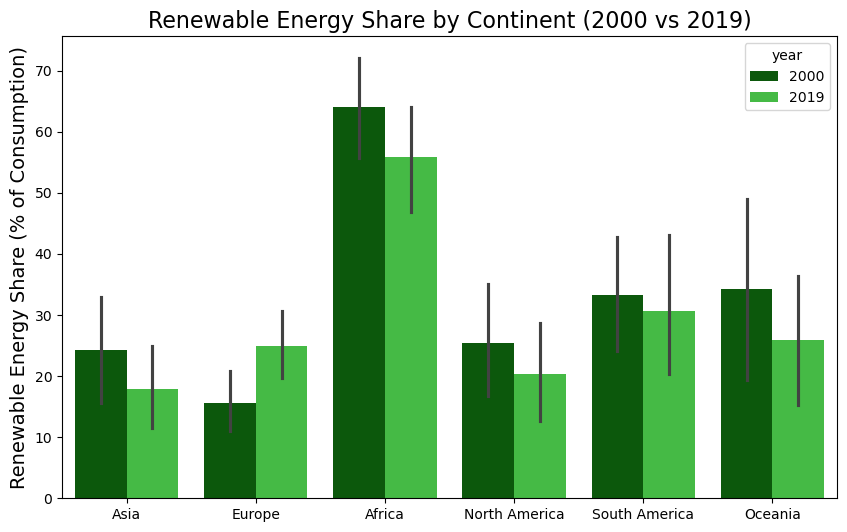

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='renewable_energy_share_in_the_total_final_energy_consumption_(%)', hue='year', data=df_2000_2019, palette=custom_green_palette)
plt.xlabel("")
plt.ylabel("Renewable Energy Share (% of Consumption)", fontsize=14)
plt.title("Renewable Energy Share by Continent (2000 vs 2019)", fontsize=16)
plt.show()

In [86]:
round(df_2000_2019.groupby(['continent','year'])['access_to_electricity_(%_of_population)'].agg(['mean', 'median']).reset_index(), 2)

,continent,year,mean,median
0,Africa,2000,37.51,26.41
1,Africa,2019,55.06,50.94
2,Asia,2000,81.55,98.91
3,Asia,2019,96.59,100.00
4,Europe,2000,100.00,100.00
5,Europe,2019,100.00,100.00
6,North America,2000,85.99,88.76
7,North America,2019,95.52,99.60
8,Oceania,2000,66.60,85.58
9,Oceania,2019,89.19,99.20


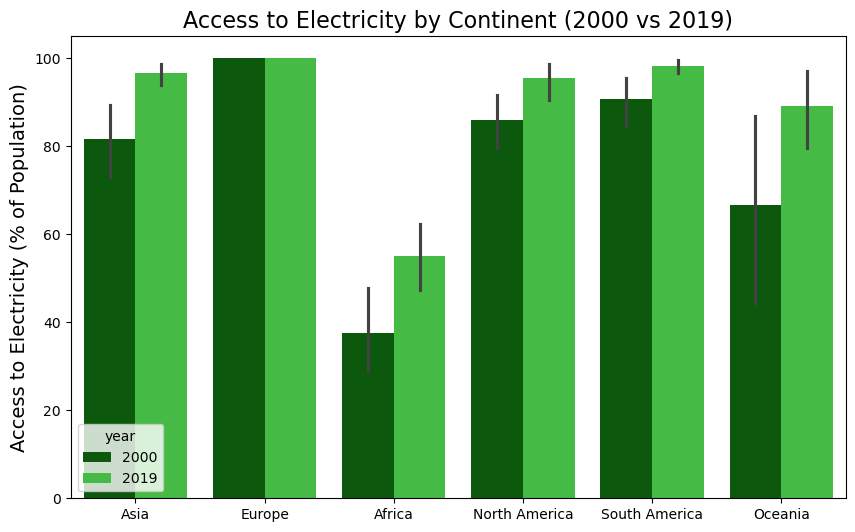

In [141]:
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='access_to_electricity_(%_of_population)', hue='year', data=df_2000_2019, palette=custom_green_palette)
plt.xlabel("")
plt.ylabel("Access to Electricity (% of Population)", fontsize=14)
plt.title("Access to Electricity by Continent (2000 vs 2019)", fontsize=16)
plt.show()

In [88]:
round(df_2000_2019.groupby(['continent','year'])['gdp_per_capita'].agg(['mean', 'median']).reset_index(), 2)

,continent,year,mean,median
0,Africa,2000,1531.46,556.84
1,Africa,2019,2880.19,1430.15
2,Asia,2000,6603.94,1651.62
3,Asia,2019,13350.08,4805.75
4,Europe,2000,15401.69,11497.75
5,Europe,2019,34126.89,25942.95
6,North America,2000,6566.89,4518.24
7,North America,2019,12264.09,8282.12
8,Oceania,2000,4628.18,1542.07
9,Oceania,2019,12545.49,4322.87


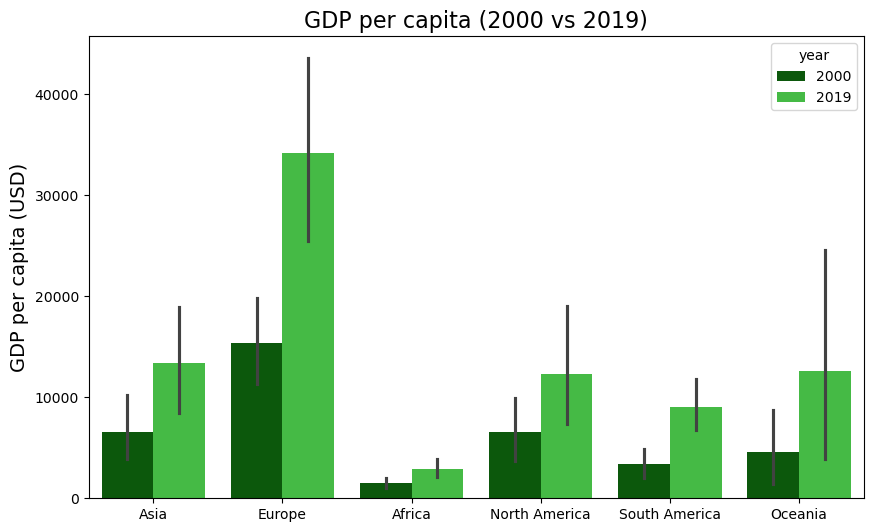

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='gdp_per_capita', hue='year', data=df_2000_2019, palette=custom_green_palette)
plt.xlabel("")
plt.ylabel("GDP per capita (USD)", fontsize=14)
plt.title("GDP per capita (2000 vs 2019)", fontsize=16)
plt.show()

In [91]:
round(df_2000_2019.groupby(['continent','year'])['value_co2_emissions_kt_by_country'].agg(['mean', 'median']).reset_index(), 2)

,continent,year,mean,median
0,Africa,2000,14116.12,1490.0
1,Africa,2019,23440.82,5250.0
2,Asia,2000,187093.33,25110.0
3,Asia,2019,455895.38,47380.0
4,Europe,2000,123287.43,52940.0
5,Europe,2019,96792.57,39140.0
6,North America,2000,296372.17,9420.0
7,North America,2019,262543.49,10550.0
8,Oceania,2000,33931.82,150.0
9,Oceania,2019,39176.36,300.0


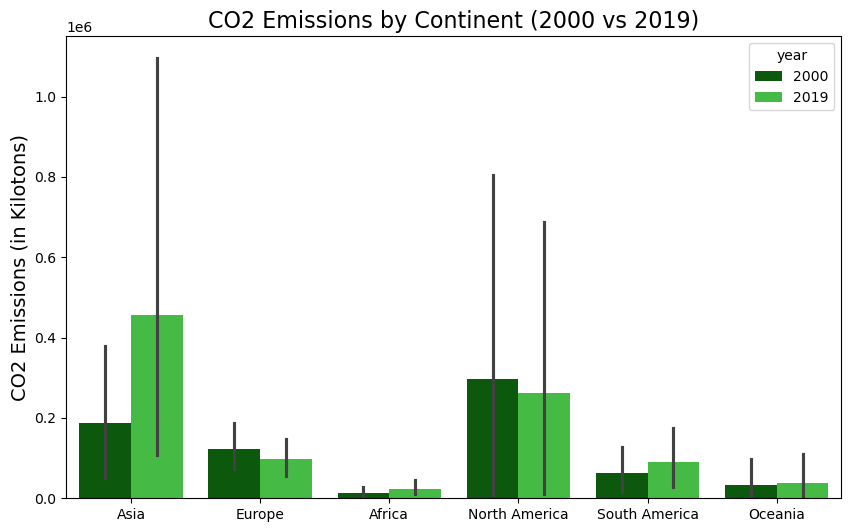

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='value_co2_emissions_kt_by_country', hue='year', data=df_2000_2019, palette=custom_green_palette)
plt.xlabel("")
plt.ylabel("CO2 Emissions (in Kilotons)", fontsize=14)
plt.title("CO2 Emissions by Continent (2000 vs 2019)", fontsize=16)
plt.show()